# Stock Forecasting using statsmodels

### Theta Model

 https://www.statsmodels.org/stable/index.html  
https://github.com/statsmodels/statsmodels  


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.forecasting.theta import ThetaModel

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '1990-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


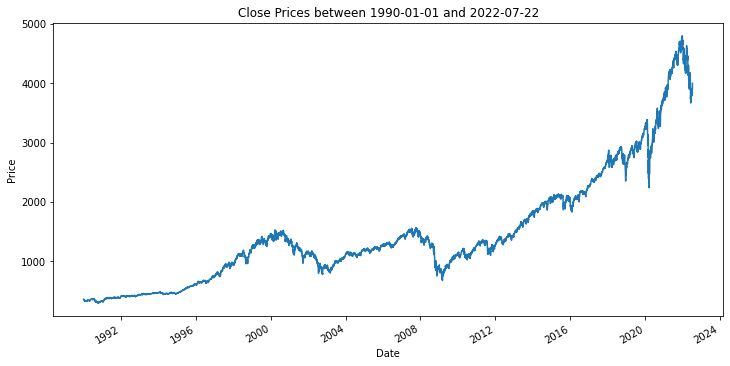

In [5]:
plt.figure(figsize = (12, 6))
plt.title('Close Prices between {} and {}'.format(
    start,
    end
))
df['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [6]:
df_month = df.resample('M').last()

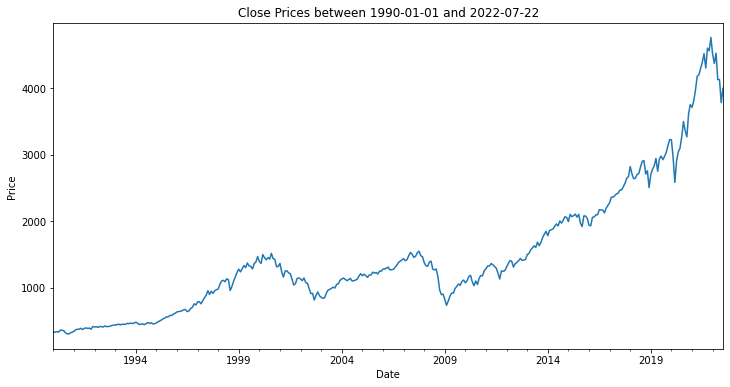

In [7]:
plt.figure(figsize = (12, 6))
plt.title('Close Prices between {} and {}'.format(
    start,
    end
))
df_month['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [8]:
close = df_month['Adj Close']

In [9]:
tm = ThetaModel(close)
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:              Adj Close   No. Observations:                  391
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Sat, 23 Jul 2022   Deseas. Method:         Multiplicative
Time:                        18:58:29   Period:                             12
Sample:                    01-31-1990                                         
                         - 07-31-2022                                         
  Parameter Estimates   
          Parameters    
------------------------
b0    7.4389379155981326
alpha 0.9345550982697094
------------------------


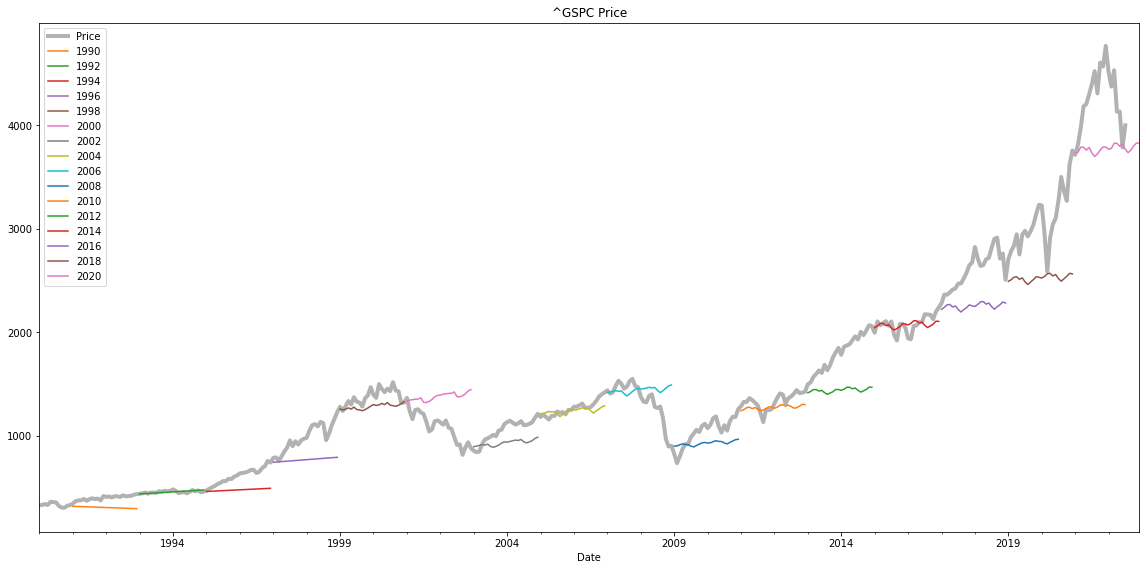

In [10]:
forecasts = {"Price": close}
for year in range(1990, 2022, 2):
    sub = close[: str(year)]
    res = ThetaModel(sub).fit()
    fcast = res.forecast(24)
    forecasts[str(year)] = fcast
forecasts = pd.DataFrame(forecasts)
ax = forecasts["1990":].plot(legend=False, figsize=(16,8))
children = ax.get_children()
children[0].set_linewidth(4)
children[0].set_alpha(0.3)
children[0].set_color("#000000")
ax.set_title(symbol + " Price")
plt.tight_layout(pad=1.0)
plt.legend(loc='best')

In [11]:
tm = ThetaModel(np.log(close), method="additive")
res = tm.fit(use_mle=True)
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:              Adj Close   No. Observations:                  391
Method:                           MLE   Deseasonalized:                   True
Date:                Sat, 23 Jul 2022   Deseas. Method:               Additive
Time:                        18:58:30   Period:                             12
Sample:                    01-31-1990                                         
                         - 07-31-2022                                         
   Parameter Estimates    
           Parameters     
--------------------------
b0    0.006389437031063614
alpha               0.9998
--------------------------


In [12]:
res.forecast_components(12)

,trend,ses,seasonal
2022-08-31,0.006391,8.285555,-0.017759
2022-09-30,0.012780,8.285555,-0.011596
2022-10-31,0.019170,8.285555,-0.000923
2022-11-30,0.025559,8.285555,0.007306
2022-12-31,0.031948,8.285555,0.003578
2023-01-31,0.038338,8.285555,-0.004157
2023-02-28,0.044727,8.285555,-0.003042
2023-03-31,0.051117,8.285555,0.011027
2023-04-30,0.057506,8.285555,0.009947
2023-05-31,0.063896,8.285555,0.001953


In [13]:
mod = ThetaModel(np.log(close))
res = mod.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:              Adj Close   No. Observations:                  391
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Sat, 23 Jul 2022   Deseas. Method:         Multiplicative
Time:                        18:58:30   Period:                             12
Sample:                    01-31-1990                                         
                         - 07-31-2022                                         
    Parameter Estimates    
            Parameters     
---------------------------
b0    0.0053652365073083895
alpha    0.9996769286768729
---------------------------


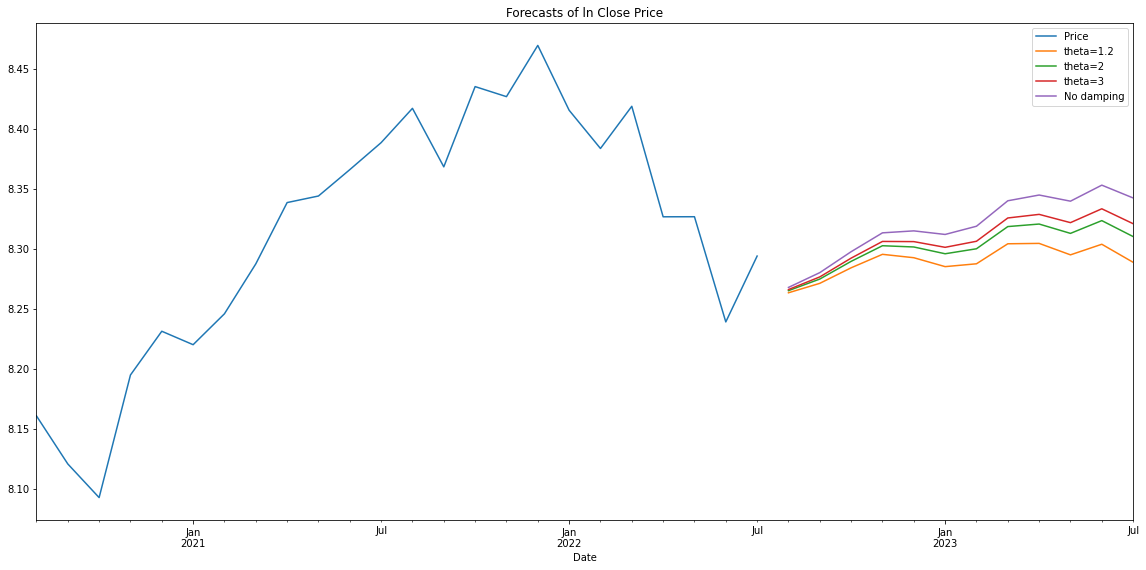

In [14]:
forecasts = pd.DataFrame(
    {
        "Price": np.log(close),
        "theta=1.2": res.forecast(12, theta=1.2),
        "theta=2": res.forecast(12),
        "theta=3": res.forecast(12, theta=3),
        "No damping": res.forecast(12, theta=np.inf),
    }
)
_ = forecasts.tail(36).plot(figsize=(16,8))
plt.title("Forecasts of ln Close Price")
plt.tight_layout(pad=1.0)



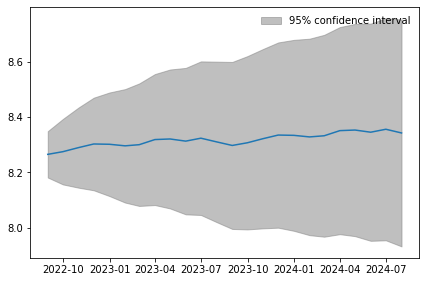

In [15]:
ax = res.plot_predict(24, theta=2)


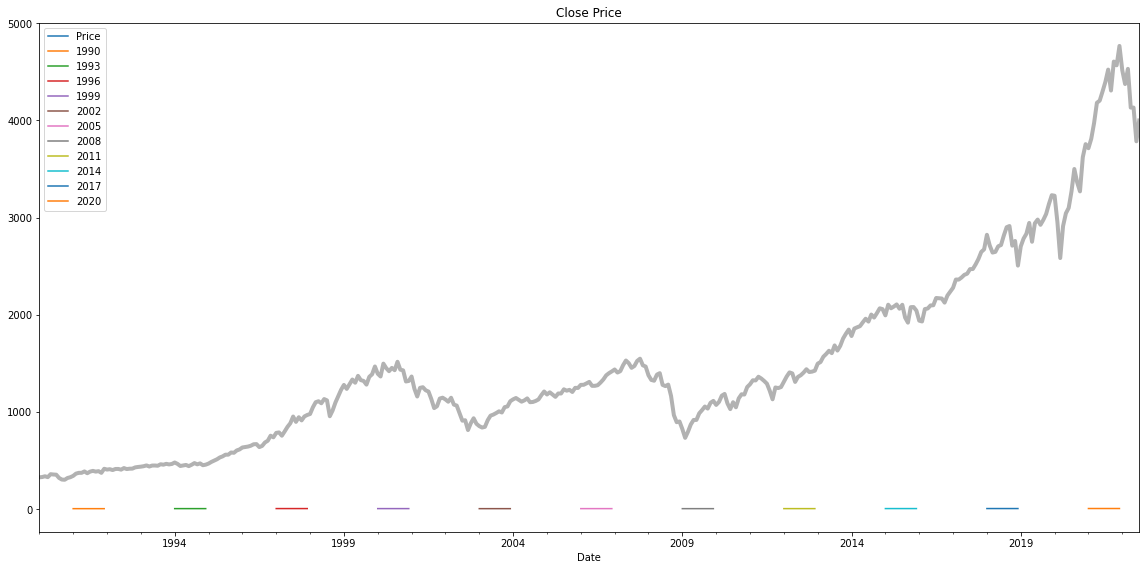

In [16]:
ln_price = np.log(close)
forecasts = {"Price": close}
for year in range(1990, 2023, 3):
    sub = ln_price[: str(year)]
    res = ThetaModel(sub).fit()
    fcast = res.forecast(12)
    forecasts[str(year)] = fcast
forecasts = pd.DataFrame(forecasts)
ax = forecasts["1990":].plot(figsize=(16,8))
children = ax.get_children()
children[0].set_linewidth(4)
children[0].set_alpha(0.3)
children[0].set_color("#000000")
ax.set_title("Close Price")
plt.tight_layout(pad=1.0)

